# Video game market analysis

**Task**:
For an online store of computer games, it is necessary to analyze the market, identify patterns that determine the success of games, determine the user profile for each of the regions, and test working hypotheses. This will allow you to place a bet on a potentially popular product and plan advertising campaigns to help develop the store's business.   


**description:**

Name - the name of the game
Platform - platform
Year_of_Release - year of release
Genre - game genre
NA_sales - Sales in North America (millions of dollars)
EU_sales - sales in Europe (millions of dollars)
JP_sales - sales in Japan (millions of dollars)
Other_sales - sales in other countries (millions of dollars)
Critic_Score - Critics score (from 0 to 100)
User_Score - user score (from 0 to 10)
Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Stages of project execution
  Step-1.-Getting-data
  Step-2.-Data-preprocessing
  Step-3.-Exploratory-data-analysis
  Step-4.-User-portrait-of-each-region
  Stage-5.-Research-of-statistical-indicators
  Stage-6.-Hypotheses-testing
  Stage-7.-Study-results

## Stage 1. Data acquisition

Let's examine the data provided for the project.

In [87]:
#import Libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's read the games.csv file and store it in the df variable.

In [88]:
# read data file and save to df
df = pd.read_csv('./Video.csv')

In [89]:
#Getting the first 10 rows of a table.
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN


In [90]:
# getting general information about the data in the df table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Global_Sales     16719 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       7590 non-null   float64
 11  Rating           9950 non-null   object 
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Let's consider the received information in more detail.

There are 15 columns in the table. There are two data types: non-null object (5 columns) and non-null float64 (10 columns).

Let's analyze in detail which columns are in df and what information they contain
* Name - the name of the game
* Platform - platform
* Year_of_Release - year of release
* Genre - game genre
* NA_sales - sales in North America (millions of dollars)
* EU_sales - sales in Europe (millions of dollars)
* JP_sales - sales in Japan (millions of dollars)
* Other_sales - sales in other countries (millions of dollars)
* Critic_Score - Critics score (from 0 to 100)
* User_Score - user rating (from 0 to 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.




**Conclusions**

Each row of the table contains historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation), release year, and assigned age rating.

The two problems that need to be addressed in the next step are gaps and poor-quality column names.

The columns Genre, Platform, Year_of_Release and the breakdown of sales by region are particularly valuable for testing working hypotheses. Using them, we will be able to track how user preferences have changed over time, to compile a portrait of a user in each region. The columns Critic_Score, User_Score, Rating will help to test hypotheses about the impact of game rating on sales depending on the genre and platform of game release.

# Stage 2. Data preprocessing

We will replace the column names, convert the data to the required types, process the gaps (with filling where possible), check the data for duplicates, and also calculate the total sales in all regions and write them in a separate column.

Get a list of column names.

In [91]:
# list of column names of table df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score',
       'Rating'],
      dtype='object')

Column names are capitalized, which is not very convenient for accessing data. Let's rename the columns for the convenience of further work. Let's check the result.

In [92]:
# rename columns
df = df.rename(columns=lambda x: x.lower())

In [93]:
# check results - list column names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'global_sales', 'critic_score', 'user_score',
       'rating'],
      dtype='object')

check for duplicates

In [95]:
# getting the total number of duplicates in the df table
df.duplicated().sum()

0

No duplicates found.я пропущенными значениями.

 check the data  to summarize the missing values.

In [96]:
# total number of missing values in table df
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
user_score         9129
rating             6769
dtype: int64

**Handling missing data in column 'name'**

First, let's look at the rows with missing data in the name column.

In [97]:
#select rows with data gaps in the name column
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN


There are only two such lines. Moreover, these rows contain gaps in other columns (genre, critic_score, user_score, rating) and refer to games released in 1993 on the GEN platform. Thus, these rows will be considered not relevant and not able to significantly affect the results of the analysis, so we will delete these rows.

In [98]:
# remove rows with missing data in the name column
# reset indexes
df = df.dropna(subset=['name']).reset_index(drop=True)

In [99]:
# check the total number of gaps in the df table
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8580
user_score         9127
rating             6767
dtype: int64

There are no data gaps in the name column now

**Handling missing data in 'year_of_release' column**

Let's look at data gaps in the year_of_release column

In [100]:
# select rows with missing data in the year_of_release column
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,5.23,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,3.49,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16374,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,0.01,43.0,NaN,E10+
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,0.01,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,0.01,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


We don't have release year data for 269 games.
Note that some of the lines in the title of the game have a release year. It can be used as a replacement for missing data for the year_of_release column 

Let's search for such strings and create a dictionary, where the key will be the index of the string in which the release year is present in the game title itself, and the release year itself will be the value.

In [101]:
idx_year = {}  # create an empty dictionary

# iterate over rows with missing year information
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # split the game name into separate words
        if item == row.name.split(' ')[-1]:  # take the last word from the list
            try:  # if the last word is a number then
                if len(item) == 2 or len(item) == 4:# check its "length"
                    item = int(item)  # convert data type
                    if item < 21:  # bring the years of this century to the full date
                        item += 2000
                    elif item > 80 and item < 100: # bring the years of the last century to the full date
                        item += 1900
                    if item >= 1980:  # 1980 is the minimum year in our data
                        idx_year[row.Index] = item
            except:  # if the last word is not a number then we continue to iterate over the lines
                continue
            
            
# check the output of the resulting dictionary
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8918  | year: 2005
index: 13195 | year: 2011
index: 13929 | year: 2006
index: 15953 | year: 2008
index: 16079 | year: 2007
index: 16374 | year: 2008


We replace the missing values ​​with those obtained from the names of the games of the year.Производим замену отсутствующих значений на полученные из названий игр года.

In [102]:
# iterate over the dictionary and replace
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

Let's check the data for the replacements made in the previous step.

In [103]:
# select rows with missing data in the year_of_release column
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,2.47,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,2.39,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,2.34,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...,...
16349,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16407,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,0.01,69.0,6.5,T
16450,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,0.01,59.0,6.7,M
16460,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


Now we don't have data on the release year of 249 games. This is less than after the previous check, which means the replacements were completed successfully.
It is possible to find the release years of games for the remaining 249 rows using the parsing of pages on the Internet, but at this stage we consider it possible to simply get rid of these rows and continue working with the existing dataset. because 249 rows is only about 1.49% of the total amount of data, which should not significantly affect the results of the study. If at some stage we realize that we will not have enough data, then we will return to the issue of parsing pages on the Internet to find the missing information.

In [105]:
# delete rows with missing data in the year_of_release column
# reset indexes
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [106]:
# check the total number of gaps in the df table
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8470
user_score         8992
rating             6685
dtype: int64

There are no data gaps in the year_of_release column now

**Handling data gaps in the 'critic_score' column**

Let's look at data gaps in the critic_score column

In [107]:
# select rows with missing data in the critic_score column
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16464,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16465,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16466,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


We don't have critical score data for 8466 games, which is about 51% of games.

Let's try to find a correlation in the available data between critics' ratings and:
* year of release of the game (suddenly in some years the critics were more favorable?)
* sales in North America (na_sales)
* sales in Europe (eu_sales)
* sales in Japan (jp_sales)
* sales in other regions (other_sales)
* total sales worldwide (global_sales)

Finding Pearson's Correlation Coefficient (year of game release VS critics' score)

In [108]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889762

The correlation is very weak. Its almost complete absence.

Let's calculate the total sales for each of the games around the world (create a new column global_sales)

In [109]:
# summarize sales by region in a new column global_sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16464,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16465,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16466,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


Finding the Pearson Correlation Coefficient (North American Sales VS Critics' Rating)

In [110]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345776

Correlation is weakКорреляция слабая

Finding Pearson's correlation coefficient (sales in Europe VS critics' score)

In [111]:
df['eu_sales'].corr(df['critic_score'])

0.22133464515023302

Correlation is weak

Finding the Pearson Correlation Coefficient (Sales in Japan VS Critics' Rating)

In [112]:
df['jp_sales'].corr(df['critic_score'])

0.15319263872334987

Correlation is weak

Finding Pearson's correlation coefficient (sales in other regions VS critics' score)

In [25]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301783

Correlation is very weak



Finding Pearson's Correlation Coefficient (Total Worldwide Sales VS Critics' Score)

In [113]:
df['global_sales'].corr(df['critic_score'])

0.24584356447587435

Correlation is weak

In all the cases considered, we obtained either a very weak or just a weak correlation between the considered features and the critics' assessment:

**minimum 'game release year VS critic score': 0.010..
maximum 'Total Worldwide Sales VS Critics' Rating': 0.245..**
Therefore, averaging critics' scores on one of these criteria to fill in data gaps does not seem appropriate.

**Handling data gaps in the 'user_score' column**

Now let's look at the missing data in the user_score column.

First, let's look at the values ​​in the user_score column.

In [27]:
df.user_score.value_counts()

7.8    322
8.0    285
8.2    277
8.3    252
7.5    249
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

The most common value is not the user's numerical score, but the string 'tbd', meaning 'to be defined'. In this situation, you can use the property of the average: if a number equal to the average is added to the dataset, then the new average of the dataset will not change, so we can replace tbd with the average in the same way as in cases where there are no NaN values.

In [114]:
# replace 'tbd' with NaN
df = df.replace('tbd', np.nan)

In [115]:
# check the success of the replacement by the total number of gaps in the df table
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8470
user_score         8992
rating             6685
dtype: int64

Change data type 'user_score' from string to floating point numbers

In [117]:
df['user_score'] = df.user_score.astype('float')

Checking if the 'user_score' datatype change was successful

In [118]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
user_score         float64
rating              object
dtype: object

The data type has been changed from object to float64. Now we can perform mathematical operations on the user_score column data.

Finding Pearson's correlation coefficient (year of game release VS user rating)

In [119]:
df['year_of_release'].corr(df['user_score'])

-0.26826355995896833

We have a weak negative correlation.

Finding the Pearson Correlation Coefficient (North American Sales VS User Ratings)

In [120]:
df['na_sales'].corr(df['user_score'])

0.08570745189151248

Correlation is very weak

Finding the Pearson correlation coefficient (sales in Europe VS user rating)

In [121]:
df['eu_sales'].corr(df['user_score'])

0.0552672913042424

Correlation is very weak

Finding the Pearson Correlation Coefficient (Sales in Japan VS User Ratings)

In [35]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268795

Correlation is very weak

Finding the Pearson correlation coefficient (sales in other regions VS user rating)


In [122]:
df['other_sales'].corr(df['user_score'])

0.05701154340120893

Correlation is very weak

Finding the Pearson Correlation Coefficient (Total Worldwide Sales VS User Ratings)

In [123]:
df['global_sales'].corr(df['user_score'])

0.08797432650715244

Correlation is very weak

Finding the Pearson Correlation Coefficient (Critic Score VS User Score)

In [124]:
df['critic_score'].corr(df['user_score'])

0.5792013058120701

Correlation average

Let's look at the distributions of user ratings and critic ratings and their dependencies.

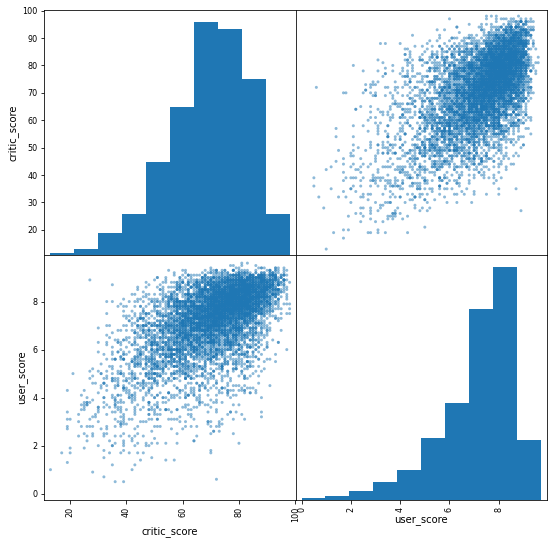

In [125]:
pd.plotting.scatter_matrix(df[['critic_score', 'user_score']], figsize=(9,9));


The distributions are close to normal. The correlation is moderate.

In all the cases considered, we obtained either a very weak or just a weak correlation between the features considered and the user ratings. The average correlation was obtained only between user ratings and critic ratings:
* minimum 'sales in Europe of the game VS user rating': 0.055..
* Max 'Critic Rating VS User Rating': 0.579..

We did not get a high or very high correlation for any of the studied traits. Therefore, averaging user ratings against one of these criteria to fill in data gaps is not appropriate.

**Handling missing data in the 'rating' column**

Since rating is a nominative variable, the most reasonable thing to do would be to replace missing values ​​with 'unknown'

In [126]:
# replacing missing values ​​in the 'rating' column with the string 'unknown' with a special replacement method
df['rating'] = df['rating'].fillna('unknown')

In [127]:
# <check: calculate the total number of gaps found in table df>
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8470
user_score         8992
rating                0
dtype: int64

After the gaps were processed, the missing values ​​remained in the critic_score and user_score columns. We do not have enough data to restore these gaps. We also see that gaps in columns often occur together, i.e. no data for the same games. This is most likely due to the fact that this data was simply not loaded into the table. After writing brief conclusions, you can proceed to the next stage.

**Conclusions**

At this stage, the names of the columns were replaced with more convenient ones for further work, and work was carried out to find and replace missing values.

We encountered missing values ​​in the name, year_of_release, critic_score, user_score, and rating columns.

There were only two gaps in the name column, which is not critical and can be caused by chance.

In the year_of_release column, the number of gaps was also not significant, some of the values ​​were restored by taking information directly from the names of the games, the rest of the data were omitted due to their small number and the inability to influence the study as a whole.

Missing critic_score and user_score values ​​make up about half of the data and often occur together. With a high probability, this tells us that some of the games were not rated or simply were not loaded into the table. An attempt was made to recover the missing values ​​by finding a correlation with sales volumes, however, as a result, the correlations turned out to be weak or very weak. As a result, it was decided to leave gaps so as not to distort the results of the study. It is better to work with less data, but good quality.

Missing game rating values ​​have been replaced with the string 'unknown', as this is a nominative variable and it is not possible to estimate its actual values ​​for a particular game.

A notable portion of the missing scores and ratings was related to the game's release year. Either this is the 1980s when the video game industry was not so developed, so the omissions of ratings and ratings seem logical, or these are the most recent games that have not yet managed to aggregate critic and user ratings (including over 2000 string values ​​'tbc' ).

The total sales in all regions were also calculated with the subsequent saving of the values ​​in a separate column 'global_sales'.

The data is prepared for further analysis.



## Step 3: Exploratory data analysis

Consider the distribution of games by year of release, evaluate the popularity of gaming platforms in certain periods of time, select relevant data for further work, making forecasts and conclusions.

**Distribution of games by year of release**

 how many games were released in different years.

In [128]:

games_per_year = df.groupby('year_of_release', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'games_number'})

 bar chart of the distribution of the number of released games by year.

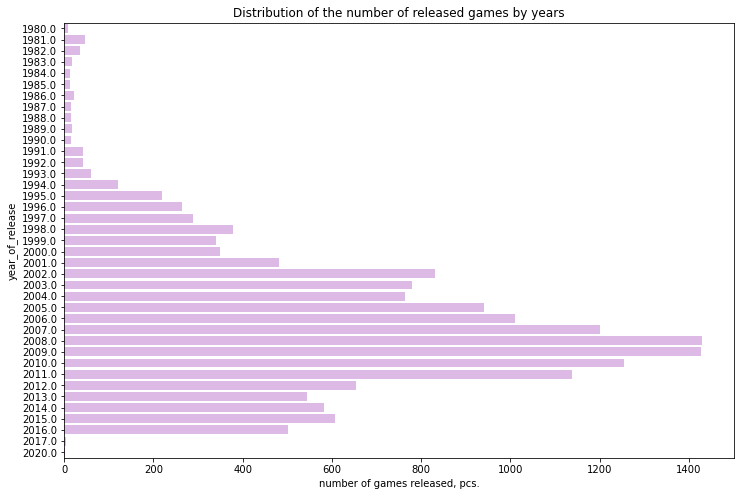

In [133]:

plt.figure(figsize=(12, 8))
# setting the parameters for plotting the graph
ax = sns.barplot(y=games_per_year.year_of_release,
                 x=games_per_year.games_number,
                 orient='h',
                 color='#e2b2ed'
                 );

# axis labels and titles
plt.xlabel('number of games released, pcs.')
plt.title('Distribution of the number of released games by years');

The graph shows that the bulk of games were released in the first decade of the twenty-first century, with a peak in 2008-2009. After 2011, there has been a significant decline in the number of released games (the rise in popularity of social networks?).

Estimate the cumulative percentage of the number of released games

In [130]:
#calculate the percentage for a particular year
games_per_year['prcnt'] = 100 * games_per_year.games_number / games_per_year.games_number.sum()
#calculate the accumulative percentage
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

# visualization of results
games_per_year

,year_of_release,games_number,prcnt,prcnt_sum
0,1980.0,9,0.054651,0.054651
1,1981.0,46,0.279330,0.333981
2,1982.0,36,0.218606,0.552587
3,1983.0,17,0.103231,0.655817
4,1984.0,14,0.085013,0.740831
5,1985.0,14,0.085013,0.825844
6,1986.0,21,0.127520,0.953364
7,1987.0,16,0.097158,1.050522
8,1988.0,15,0.091086,1.141608
9,1989.0,17,0.103231,1.244838


Building a cumulative chart of the percentage of released games.

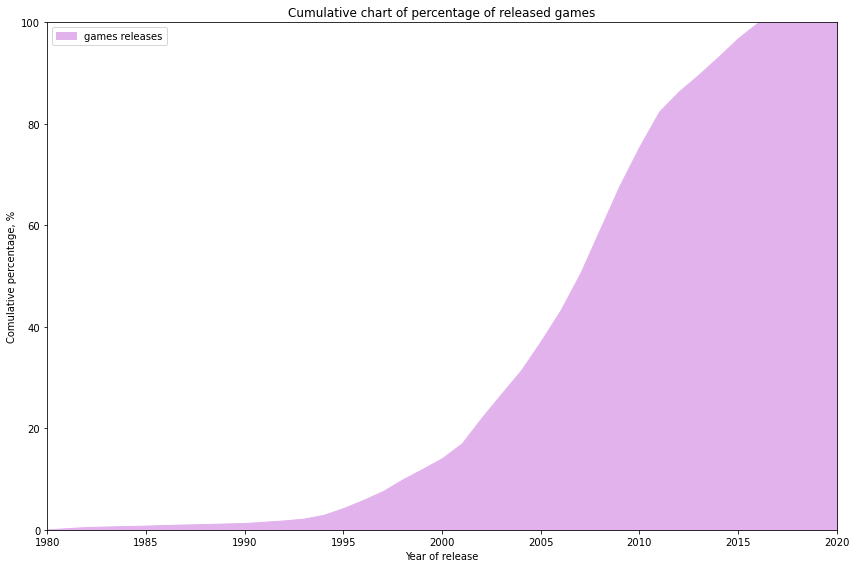

In [134]:
# data transformation
rnd = np.asarray(games_per_year.loc[:, 'prcnt_sum'].to_list())
yrs = np.asarray(games_per_year.loc[:, 'year_of_release'].to_list())

# construction and design of the graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(yrs, rnd, labels=['games releases'], color='#e2b2ed')
ax.set_title('Cumulative chart of percentage of released games')
ax.legend(loc='upper left')
ax.set_xlabel('Year of release')
ax.set_ylabel('Comulative percentage, %')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
ax.set_ylim(ymin=0, ymax=100)
fig.tight_layout()
 
plt.show();

According to the data obtained, it is clearly seen that for the first half of the presented period (from 1983 to 1999) about 11% of the total number of released games were released, and for the second half, the remaining 89%. Half of the released games were released between 2007 and 2016. Thus, it can be concluded that the data for the 80s and 90s of the twentieth century do not carry much weight in quantitative terms for the available data set.

Let's look at the dynamics of total sales.

In [135]:
df_sales = df.groupby('year_of_release', as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

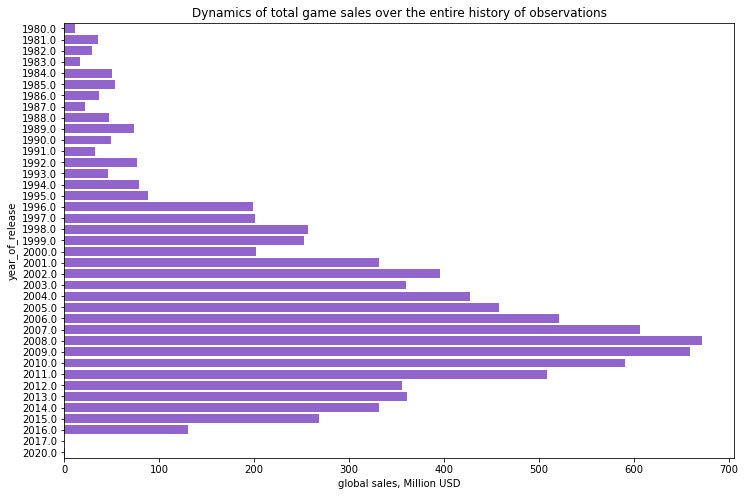

In [136]:
plt.figure(figsize=(12, 8))
# setting the parameters for plotting the graph
ax = sns.barplot(y=df_sales.year_of_release,
                 x=df_sales.global_sales,
                 orient='h',
                 color='#9054DE');


plt.xlabel('global sales, Million USD')
plt.title('Dynamics of total game sales over the entire history of observations');

The dynamics of overall sales in general closely follows the dynamics of the release of new games, with a peak in 2008-2009 and then a decline to the values ​​of the early 2000s, when the computer games industry was at the beginning of its rise.

Next, consider the distribution of sales by platform. Let's define fashionable in the past and popular now platforms. Let's evaluate the life cycle of platforms.

**Changes in sales by platform**

In [137]:

plt_sales = df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)


plt_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,803.08
15,PS,729.04
18,PS4,314.18
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


<Figure size 864x576 with 0 Axes>

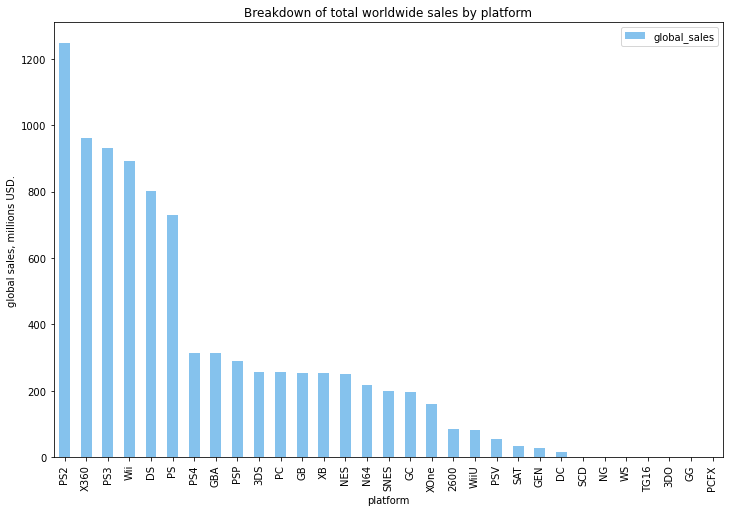

In [140]:

plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
plt_sales.plot(x='platform',
               y='global_sales',
               kind='bar',
               figsize=(12, 8),
               title='Breakdown of total worldwide sales by platform',
               color='#85c2ed');


plt.ylabel('global sales, millions USD.');

The graph clearly shows the leaders in total global sales: PS2, X360, PS3, Wii, DS, PS. There is a 2-4x lead compared to the next highest-grossing platform, PS4. The data of the top 6 platforms is the main contender for detailed further analysis. However, you must first check the relevance of certain platforms.

To assess the dynamics of platform popularity over the years, we will select platforms whose total sales exceed the median value, i.e. Let's take the first half of the list ranked by world sales.

In [141]:
# create a list of platform names with total global sales greater than the median
platforms_above_median = []

for row in plt_sales.itertuples():  # iterate over the dataframe

    if row.global_sales > plt_sales.global_sales.median():  # compare sales values ​​with the median
        platforms_above_median.append(row.platform)  # add the platform name to the list

# check result (list of platform names)
platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

In [142]:
# grouping data by years and platforms and calculating total global sales
plt_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

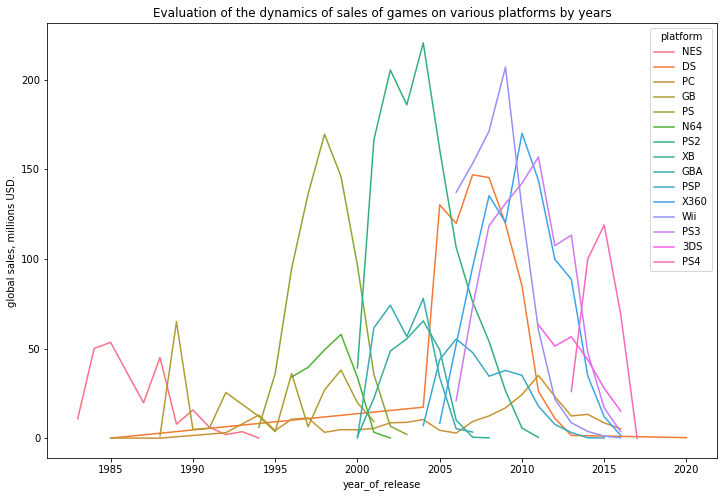

In [144]:

plt.figure(figsize=(12, 8))


sns.lineplot(x=plt_sales_year.year_of_release,
             y=plt_sales_year.global_sales,
             hue=plt_sales_year.platform);


plt.ylabel('global sales, millions USD.');
plt.title('Evaluation of the dynamics of sales of games on various platforms by years');

Let's build a graph of the distribution of the life cycle of platforms. Consider the main statistics of the resulting indicator.

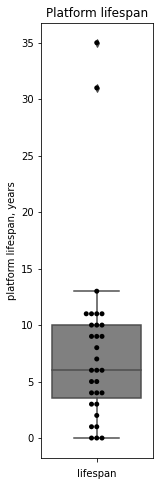

In [145]:
# calculate platform lifetime
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

# mark up space for plotting
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)

# plotting and designing a chart (boxplot + value points (swarmplot))
sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')

# axis labels and chart name
ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

The graph shows that there are two outliers, otherwise, most of the data is placed inside the interquartile range. Due to the presence of outliers, we will use the median value (6 years) when we talk about the average value of the platform life cycle.

In [146]:
# basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.903226
std       7.721636
min       0.000000
25%       3.500000
50%       6.000000
75%      10.000000
max      35.000000
Name: year_of_release, dtype: float64

The resulting graphs clearly show that the average platform life cycle is 6 years (the only exception is PC and DS). We also see that the overall bestseller PS2 has completely exhausted itself and its last sales were in 2011. Therefore, it will be incorrect for our tasks to select data by the size of sales for the entire history. We thus greatly distort the results of our research. Therefore, we will take another criterion for our sample: we will take half the value of the third quartile (5 years). Thus, our sample will include both platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.

In [148]:
# grouping platform data for the last 5 years by year and platform and calculating total global sales
plt_sales_5year = df.query('year_of_release > 2011') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

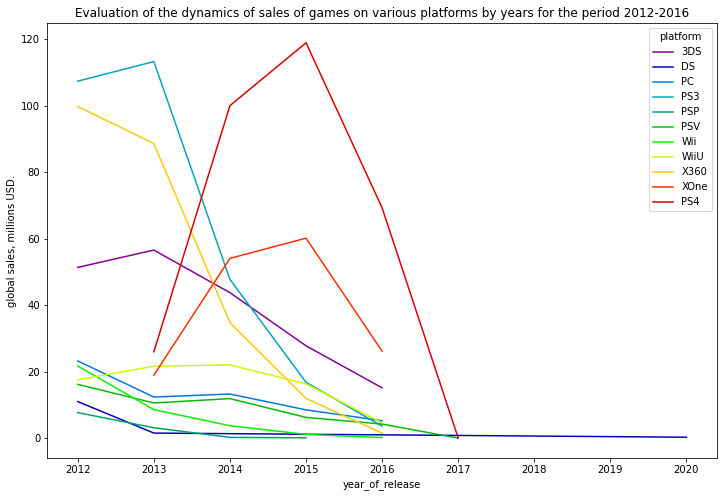

In [149]:

plt.figure(figsize=(12, 8))

sns.lineplot(x=plt_sales_5year.year_of_release,
             y=plt_sales_5year.global_sales,
             hue=plt_sales_5year.platform,
             legend='full',
             palette='nipy_spectral');

plt.ylabel('global sales, millions USD.');
plt.title('Evaluation of the dynamics of sales of games on various platforms by years for the period 2012-2016');

Considering that our data for 2016 is not complete, having adjusted for this, using the graph above, we can say that at the moment only two platforms are still growing and promising: PS4 and XOne. The remnants of popularity are in the 3DS. Sales of games on other platforms are insignificant or tend to zero. Therefore, at this stage of the study, we will continue to work with these three platforms: PS4, XOne, 3DS.


**Further exploration of PS4, XOne, 3DS platforms**

Let's make a slice of the dataframe, which will include data for the last 5 years only for three selected platforms based on the results of the previous step. Let's take a closer look at the breakdown of sales by platform.

In [150]:
# list of the names of the three most relevant platforms
popular_platforms = ['PS4', 'XOne', '3DS']

# make a selection by platform name and year
df_3p = df.query('platform in @popular_platforms & year_of_release > 2011') \
          .reset_index(drop=True)

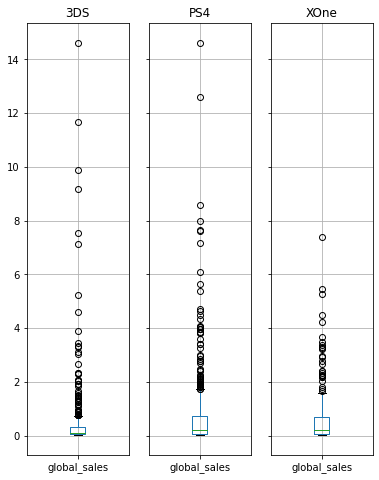

In [151]:
# build a boxplot chart (global sales by platform)
df_3p.groupby(['platform']).boxplot(column='global_sales',
                                    figsize=(6, 8),
                                    layout=(1, 3));

Additionally, we obtain the main statistical indicators of our cut

In [152]:
# getting descriptive statistics
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,393.0,0.799440,1.607861,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


According to the resulting graph, we can observe that the average values ​​for all platforms are approximately the same. We can also tell by the presence of a large number of outliers on the charts of all platforms that the main revenue comes from a small number of hit games. Their sales are 11-20 times higher than the average total sales. Moreover, there are more such hit games both in terms of the total number and the amplitude of the observed effect on the 3DS and PS4 platforms.

Let's find the game with the highest global sales for each of the platforms.

In [153]:
# select indexes
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      1
PS4      0
XOne    11
Name: global_sales, dtype: int64

In [154]:
# display the best-selling games by selected indices
df_3p.iloc[[1, 0, 11]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
1,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,unknown
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,unknown
11,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,unknown


For the PS4 and XOne platforms, 'Call of Duty: Black Ops 3 (2015)' was the best-selling game, while for the 3DS, it was 'Pokemon X/Pokemon Y' from 2013, which confirms the thesis that the popularity of this game will decrease over time. platforms.

Let's see how they affect sales within one popular platform
reviews from users and critics. We will build scatterplots and calculate the correlation coefficients between reviews and sales.

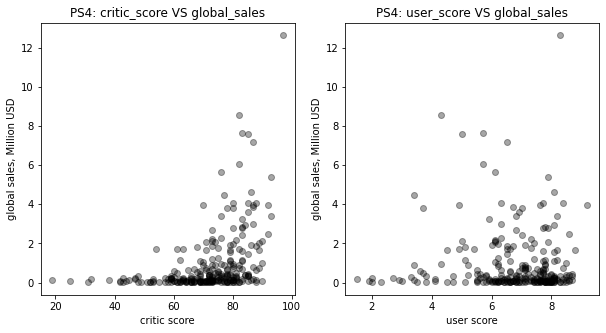

In [155]:
# make a slice of data by platform name
df_ps4 = df_3p.query('platform == "PS4"')

# mark up space for plotting
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# building and designing a scatter plot for critics' reviews
ax1.scatter(x=df_ps4.critic_score,
            y=df_ps4.global_sales,
            alpha=0.35,
            color='black');
ax1.set_title('PS4: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# building and designing a scatter plot for user feedback
ax2.scatter(x=df_ps4.user_score,
            y=df_ps4.global_sales,
            alpha=0.35,
            color='black');
ax2.set_title('PS4: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [156]:
# Calculate and display correlation coefficientsprint('PS4:')
print('Correlation coefficient of global sales and critics ratings:', round(df_ps4['global_sales'].corr(df_ps4['critic_score']), 3))
print('Correlation coefficient of global sales and user ratings:', round(df_ps4['global_sales'].corr(df_ps4['user_score']), 3))

Correlation coefficient of global sales and critics ratings: 0.407
Correlation coefficient of global sales and user ratings: -0.032


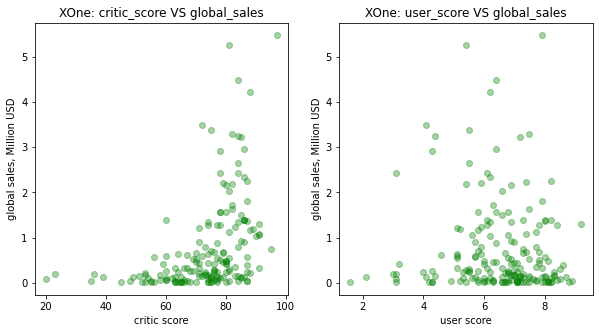

In [157]:
# make a slice of data by platform name
df_xone = df_3p.query('platform == "XOne"')

# mark up space for plotting
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# building and designing a scatter plot for critics' reviews
ax1.scatter(x=df_xone.critic_score,
            y=df_xone.global_sales,
            alpha=0.35,
            color='green');
ax1.set_title('XOne: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# building and designing a scatter plot for user feedback
ax2.scatter(x=df_xone.user_score,
            y=df_xone.global_sales,
            alpha=0.35,
            color='green');
ax2.set_title('XOne: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [159]:
# Calculate and display correlation coefficients
print('XOne:')
print('Correlation coefficient of global sales and critics ratings:', round(df_xone['global_sales'].corr(df_xone['critic_score']), 3))
print('Correlation coefficient of global sales and user ratings:', round(df_xone['global_sales'].corr(df_xone['user_score']), 3))

XOne:
Correlation coefficient of global sales and critics ratings: 0.417
Correlation coefficient of global sales and user ratings: -0.069


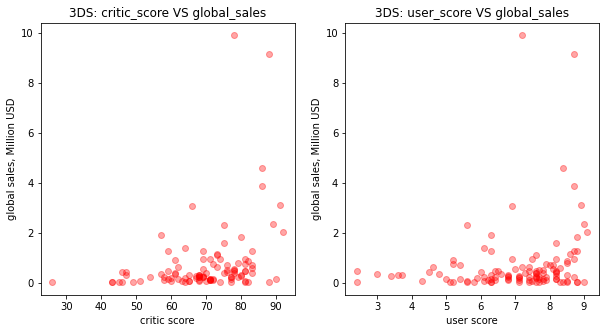

In [160]:
# make a slice of data by platform name
df_3ds = df_3p.query('platform == "3DS"')

# mark up space for plotting
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)
# building and designing a scatter plot for critics' reviews
ax1.scatter(x=df_3ds.critic_score,
            y=df_3ds.global_sales,
            alpha=0.35,
            color='red');
ax1.set_title('3DS: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')


# building and designing a scatter plot for user feedback
ax2.scatter(x=df_3ds.user_score,
            y=df_3ds.global_sales,
            alpha=0.35,
            color='red');
ax2.set_title('3DS: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [161]:
# Calculate and display correlation coefficients
print('3DS:')
print('Correlation coefficient of global sales and critics scores:', round(df_3ds['global_sales'].corr(df_3ds['critic_score']), 3))
print('Correlation coefficient of global sales and user ratings:', round(df_3ds['global_sales'].corr(df_3ds['user_score']), 3))

3DS:
Correlation coefficient of global sales and critics scores: 0.321
Correlation coefficient of global sales and user ratings: 0.198


The correlation between sales and critical reviews is weak. The correlation between sales and user ratings is very weak, almost zero for PS4 and XOne. These conclusions are the same for all three considered platforms. Correlation between sales and critics' ratings for PS4 and XOne (about 0.41), and for 3DS (about 0.32).

Next, let's look at the overall distribution of games by genre for the previously selected data (PS4, XOne, 3DS platforms; data from 2012).

In [162]:
# grouping by genres, sorting and selecting data
genres_sales_all = df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

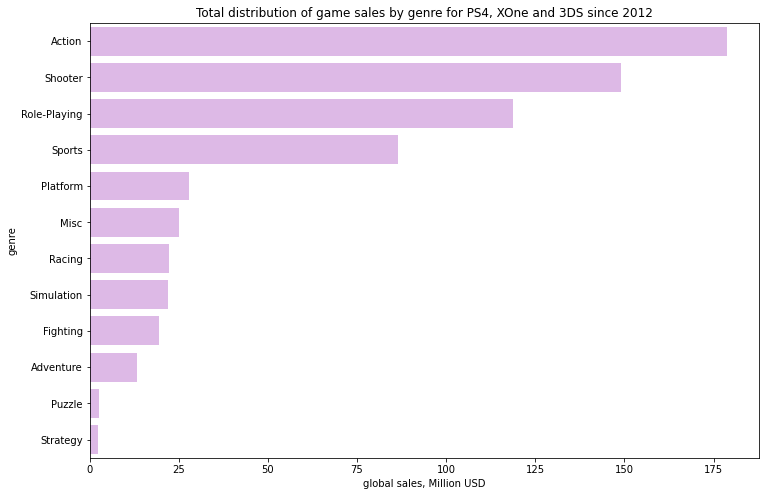

In [163]:
# figure size
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=genres_sales_all.genre,
                 x=genres_sales_all.global_sales,
                 orient='h',
                 color='#e2b2ed',
                 ci=None);

plt.xlabel('global sales, Million USD')
plt.title('Total distribution of game sales by genre for PS4, XOne and 3DS since 2012');

The most popular genres are Action, Shooter and Role-Playing. Fourth place is occupied by the Sports genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differ tenfold compared to other genres.

Let's see the popularity of genres by platform.

In [164]:
# grouping by genres and platforms, sorting and selecting data
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

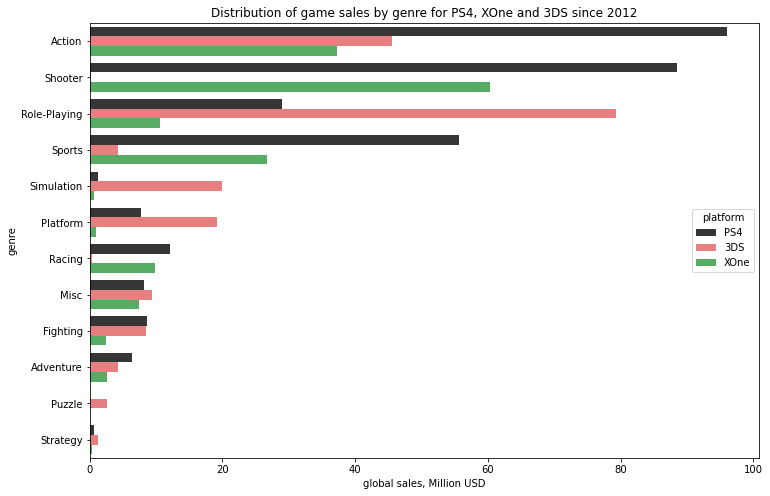

In [166]:
# figure size
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.global_sales,
                 orient='h',
                 color='#6925c2',
                 palette=['#363636', '#f76f6f', '#49ba5a'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', '3DS', 'XOne']
                 );


plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by genre for PS4, XOne and 3DS since 2012');

It is interesting to note that the 3DS platform stands out in terms of genre preferences. For example, the Shooter genre is not at all popular on it, while Role-Playing takes first place by a wide margin. Genre Sports (4th place in the overall ranking) is the most popular among PS4 users.

**Conclusions**

At this stage, an exploratory analysis of the data was carried out.
The number of games released in different periods is certain (half of the games presented were released from 2007 to 2016).

The average life cycle of the popularity of gaming platforms (about 6 years) is noted.

The three most relevant platforms at the moment and in terms of perspectives for the next few years (PS3, XOne, 3DS) have been identified.
The correlation between critics' ratings and user's ratings is determined. In general, critic ratings are weakly correlated with sales, and user ratings and sales have a very weak correlation (virtually zero).
The most popular game genres over the past 5 years (Action, Shooter and Role-Playing) have been found. A breakdown of the popularity of genres by platform was obtained (the preferences of users of the 3DS platform stand out from the background of other users: for example, such users are not at all interested in the Shooter game genre, which is more than popular on other platforms).
 

It was also noted that a small number of hit games generates most of the total revenue. Sales of which are dozens of times higher than the sales of the average by the standards of the total world sales of games.

## Stage 4. User portrait of each region

Let's determine for the user of each region the most popular platforms, the most popular genres, as well as the impact of the ESRB rating on sales by region.

Let's take the most relevant data, making a sample for the last 5 years (starting from 2012).


In [167]:
# select data for the last five years
df_4 = df[df['year_of_release'] > 2011].reset_index(drop=True)

**Determine the popularity of platforms by region.**

In [168]:
# get the required data slice
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

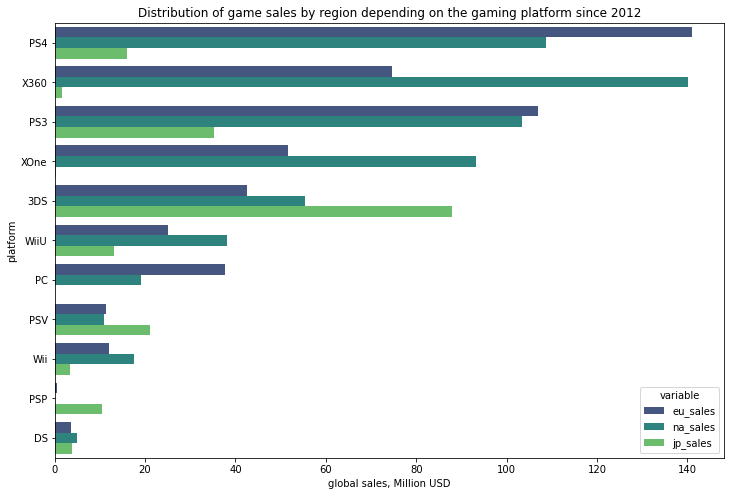

In [170]:

plt.figure(figsize=(12, 8))


ax = sns.barplot(y=df_4_region.platform,
                 x=df_4_region.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_region.variable);

plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the gaming platform since 2012');

The list of Top 5 platforms is as follows:
1. PS4
2.X360
3. PS3
4.Xone
5.3DS

It should be noted that in the European market the platforms of the manufacturer Sony (PS4, PS3) are the most popular, while in North America the most popular game consoles are Microsoft (X360 and its successor XOne). In Japan, the most popular platform is the 3DS produced by the local company Nintendo.

**Define the most popular game genres by region.**

In [75]:
# get the required data slice
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

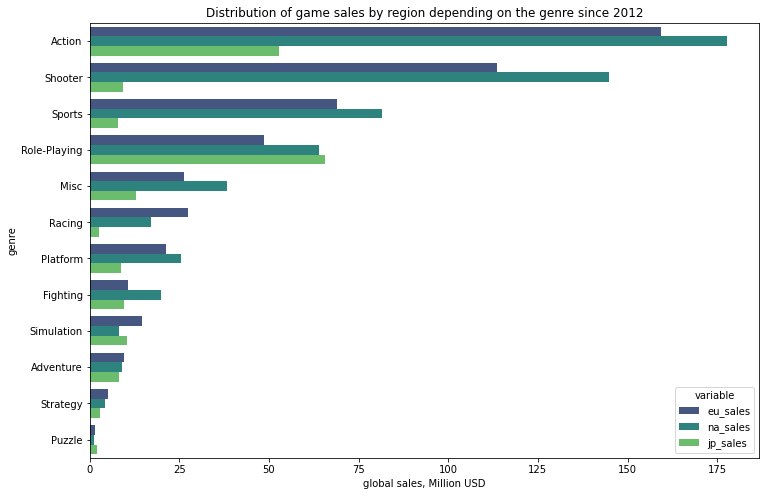

In [171]:

plt.figure(figsize=(12, 8))


ax = sns.barplot(y=df_4_genre.genre,
                 x=df_4_genre.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);


plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the genre since 2012');

List of Top 5 most popular genres:
1. Action
2 Shooter
3. Sports
4.Role Playing
5.Misc

Note that in Japan, shooters are much less popular in comparison with Europe and North America. In the Japanese archipelago, the most popular genres are Role-Playing and Action.
It is also worth noting that the total sales of games of all genres in North America and Europe are approximately comparable, while in the Asian market it is less than half.

**Let's consider the impact of the ESRB rating on sales in a particular region***

In [172]:
# get the required data slice
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

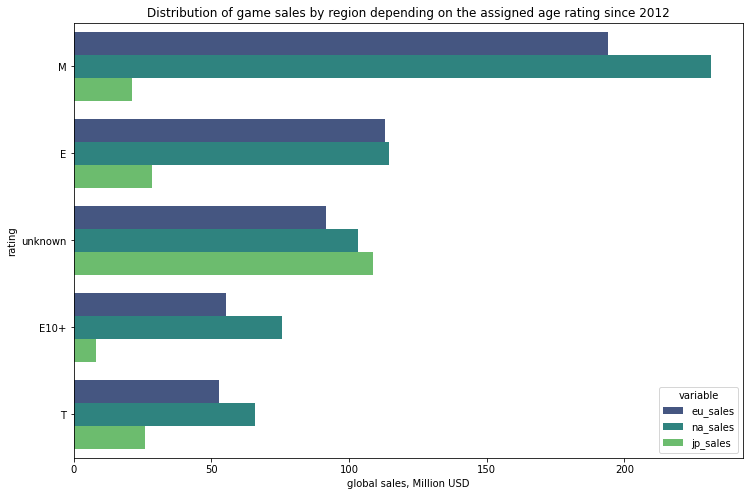

In [173]:

plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_4_rating.rating,
                 x=df_4_rating.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);


plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the assigned age rating since 2012');

Games rated M (content suitable for over 16s) are twice as popular as the other categories in the European and North American markets. The rest of the game categories are distributed relatively evenly across these markets. In Japan, the most popular games, also exceeding twice the pursuers, are games whose age rating is unknown to us ('unknown'). First of all, this may be due not so much to user preferences, but to the fact that the rating organizer (ESRB, Location: New York City, New York, U.S) does not pay due attention to games released locally on the Asian market.

**Conclusions**

After the analysis, we can conclude that the profile of the user of the North America and Europe regions does not differ much, while Asian consumers stand out according to the analyzed parameters (platform choice, favorite genre, situation with the rating of the best-selling game). Therefore, it is worth considering the historical and cultural differences of the regions, which are reflected directly in the preferences of users when doing business.

## Stage 5. Research of statistical indicators

At this stage, we will study the user rating and the rating of critics in more detail. Let's explore the statistics.

Let's take the data slice used in the previous step (data for the last 5 years (starting from 2012).

In [174]:
# get the necessary slice of data, bringing the critic_score to the dimension of user_score by dividing by 10
df_5 = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

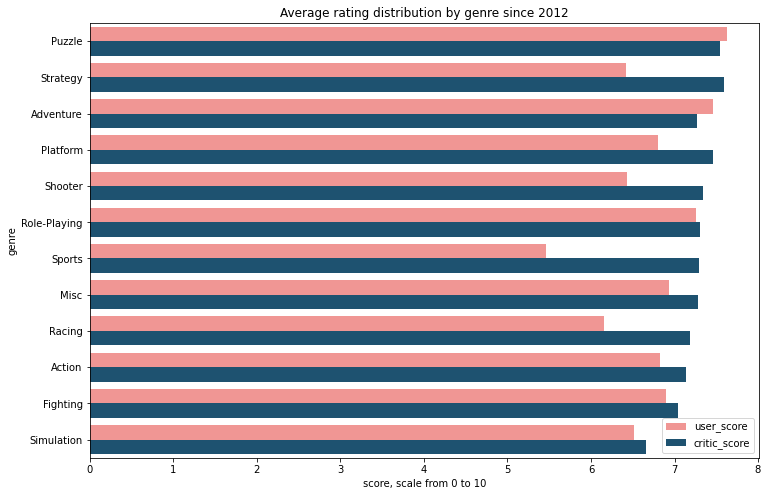

In [175]:

plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_5.genre,
                 x=df_5.value,
                 orient='h',
                 color='#6925c2',
                 palette=['#FF8785', '#10567E'],
                 hue=df_5.variable);

ax.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.title('Average rating distribution by genre since 2012');

In most cases, the assessments of critics and users agree quite well. Especially for the Puzzle and Role-Playing genres.
The greatest discrepancies in ratings between critics and users are observed for the Sports and Racing genres (in both cases, critics are more favorable to games than users).
The genres with the highest average critical acclaim are Strategy, Platform, and Puzzle.
It is interesting to note that for all genres, the average critic rating is almost always higher than the average user rating (exceptions: Puzzle and Adventure).

Let's look at the distribution of critics' and users' ratings.

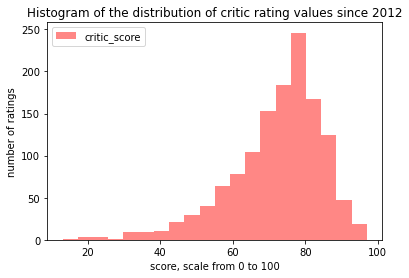

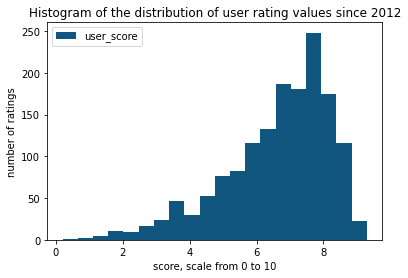

In [176]:
# building a histogram for critics' ratings
df_4.plot(y='critic_score',
          kind='hist',
          bins=20,
          color='#FF8785')

#axis labels and titles
plt.legend(loc = 'upper left')
plt.xlabel('score, scale from 0 to 100')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of critic rating values ​​since 2012');


# building a histogram for user ratings
df_4.plot(y='user_score',
          kind='hist',
          bins=20,
          color='#10567E')
# axis labels and titles

plt.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of user rating values ​​since 2012');

Both distributions are close to normal. They are unimodal and symmetrical in shape. This means that there are no serious errors in the data and you can treat them as really independent and random relative to each other. Therefore, in what follows we can use the basic statistical mat. apparatus for testing various hypotheses.

Let's look at the distributions of the main statistics of critics' and users' ratings (mean, variance, standard deviation).

In [177]:
# count statistics
# the maximum values ​​for each column are highlighted in green
# the minimum values ​​for each column are highlighted in red
df_5_wide = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': ['mean', 'var', 'std'],
          'user_score': ['mean', 'var', 'std']}) \
    .style.highlight_min(axis=0, color='#FFC3C2') \
    .highlight_max(axis=0, color='#D8ECC1')

df_5_wide

**Conclusions****Выводы**

The maximum average rating from critics was received by games of the Strategy genre, the minimum games of the Simulation genre. The greatest spread of ratings among critics is observed for games of the Sports genre, the smallest for Puzzle games.

The maximum average rating of users was received by games of the Puzzle genre, the minimum games of the Sports genre. The greatest spread of ratings among users is observed for games of the Strategy genre, the smallest for Puzzle games.

Perhaps in the ranks of ordinary users there is a group of game lovers who have a pronounced negative attitude towards games of the Sport genre and rate these games as low as possible. Critics are more based not on personal preferences of genres, but on the quality of games in general. This may explain the highest delta of ratings for Sports games by critics and users, as well as the largest spread of ratings (variance and standard deviation) for Sports games among users, after the Strategy genre.

## Stage 6. Hypothesis testing

**Hypothesis test #1.**

Null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.
Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are different.

In [179]:
# make a sample of the data required to test the hypothesis
sample_1 = np.asarray(df_4.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(df_4.query('platform == "PC"').user_score.to_list())

# remove NaN values ​​from our selections
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # critical level of statistical significance
# if p-value is less than it - reject the hypothesis

# test for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('The sample variances are different. We will use equal_var = False')
    param = False


# running a t-test  
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

The sample variances are different. We will use equal_var = False
p-value: 0.5489537965134912
Failed to reject the null hypothesis


The null hypothesis could not be rejected. Thus, we have strong reasons to believe that the average rankings of the Xbox One and PC platform are the same.


**Hypothesis test #2.**

Null Hypothesis: The average user ratings for the Action and Sports genres are the same.
Alternative hypothesis: the average user ratings of the Action and Sports genres are different.

In [180]:
# make a sample of the data required to test the hypothesis
sample_1 = np.asarray(df_4.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(df_4.query('genre == "Sports"').user_score.to_list())


# remove NaN values ​​from our selections
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # critical level of statistical significance
# if p-value is less than it - reject the hypothesis


# test for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('The sample variances are different. We will use equal_var = False')
    param = False

    
# running a t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

The sample variances are different. We will use equal_var = False
p-value: 4.24307776572644e-20
Rejecting the null hypothesis


We were able to reject the null hypothesis. Thus, we have strong reasons to believe that the average user ratings of the Action and Sports genres are different.


**Conclusions**

At this stage, we were able to test two hypotheses about average user ratings. As a result of the hypothesis testing, we can now assume with a high degree of certainty that:
* the average user ratings of the Xbox One and PC platforms are the same;
*Average user ratings for the Action and Sports genres are different.

## Stage 7. Research results


**Working hypotheses**
* The average user ratings of the Xbox One and PC platforms are the same;
* Average user ratings for Action and Sports genres are different.
**General conclusions**
* half of all video games were released between 2007 and 2016;
* the peak of global sales of released games was in 2008-2009. At the moment, the video game industry is in a recession;
* the life cycle of a video game platform is about 7-10 years;
* for the near future, platforms are promising: PS4, XOne and DS3;
* the most popular game genres over the past 5 years: Action, Shooter and Role-Playing;
* most of the total revenue is generated by a small number of hit games, the sales of which are dozens of times higher than the sales of other games;
* The user profile of North America and Europe does not differ much in preferences, while Asian consumers stand out both in terms of platform choice and favorite genre. Therefore, it is worth considering the historical and cultural differences of the regions, which are reflected directly in the preferences of users when doing business;
* critics' and users' ratings have an average correlation and generally agree well with each other;
* at the same time, it was found that critics' ratings and user ratings do not greatly affect sales dynamics (weak correlation is observed in both cases).
* as a result of testing hypotheses, we were able to confirm the first hypothesis and refute the second one.

**General recommendations**
* bet on the sale of games for platforms PS4, XOne and DS3;
* give preference to games of the Action, Shooter and Role-Playing genres;
* take into account the specifics of the Asian market when launching advertising campaigns;
* in the long term, think about business diversification and / or other sources of revenue.